In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from scipy import interpolate

In [2]:
cd D:\OneDrive\Lammps\nanoglass\20181116_800K_NPTb+800-300K_NPTb+300K_NVTb_xTen_E-2Aps\data_analyses_2\rdf

D:\OneDrive\Lammps\nanoglass\20181116_800K_NPTb+800-300K_NPTb+300K_NVTb_xTen_E-2Aps\data_analyses_2\rdf


In [3]:
temp = 800
step = 1200
estrain = step * 0.01 * 0.042

gRDF_filename = 'gRDF_ZrCuO_%iK_%i'%(temp, step)
pRDF_filename = 'pRDF_ZrCuO_%iK_%i'%(temp, step)

In [4]:
with open(gRDF_filename+'.txt') as f:
    lines = f.readlines()
tables = lines[1:]

with open(gRDF_filename+'.csv', 'w') as nf:
    for line in tables:
        nf.write(line)

In [5]:
gRDF_origin_data = pd.DataFrame(pd.read_csv(gRDF_filename+'.csv', sep=' '))
gRDF_origin_data.columns=['r', 'Global','Null']
del gRDF_origin_data['Null']

In [6]:
with open(pRDF_filename+'.txt') as f:
    lines = f.readlines()
tables = lines[1:]
with open(pRDF_filename+'.csv', 'w') as nf:
    for line in tables:
        nf.write(line)

In [7]:
pRDF_origin_data = pd.DataFrame(pd.read_csv(pRDF_filename+'.csv', sep=' '))
pRDF_origin_data.columns = ['r','Cu-Cu','O-Cu','Cu-Zr','O-O','O-Zr','Zr-Zr','Null']
del pRDF_origin_data['Null']

In [8]:
df00=pd.merge(gRDF_origin_data, pRDF_origin_data).set_index(['r'])
df00=df00[['Global', 'Cu-Cu', 'Cu-Zr',  'Zr-Zr', 'O-Cu', 'O-Zr','O-O']]
df00 = df00 / df00.iloc[-1]

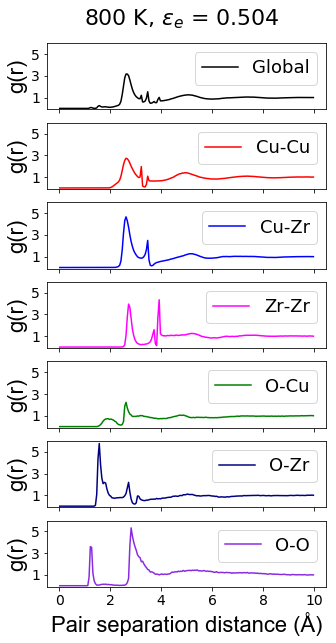

In [9]:
colors =['k','red','blue','magenta','green','navy','blueviolet','steelblue','cyan']
ranges = range(0, len(df00.columns.values), 1)

font1 = {'family' : 'Arial',
'weight' : 'normal',
'color':'k',
'size'   : 22,
}

labelfontsize = 18
xylabelfontsize = 14

mpl.rcParams['xtick.labelsize'] = xylabelfontsize
mpl.rcParams['ytick.labelsize'] = xylabelfontsize

fig, axs = plt.subplots(7,1,figsize=(5,10),sharey=True,sharex=True, dpi=72)

for row, col, clr in zip(ranges, df00.columns.values.tolist(), colors):
    axs[row].plot(df00[col],color=clr)
    axs[row].legend(fontsize=labelfontsize)
    axs[row].set_ylabel('g(r)',font1)

    axs[row].set_ylim(-0.1,6)
    axs[row].set_yticks([1,3,5])
    
plt.xlabel('Pair separation distance (Å)',font1)
fig.suptitle('%i K, $ε_e$ = %.3f'%(temp,estrain),position=(0.5,0.93), fontsize= 22)
fig.savefig('RDF_ZrCuO_%iK_%i.jpg'%(temp, step),dpi=1200,figsize=(10,20))

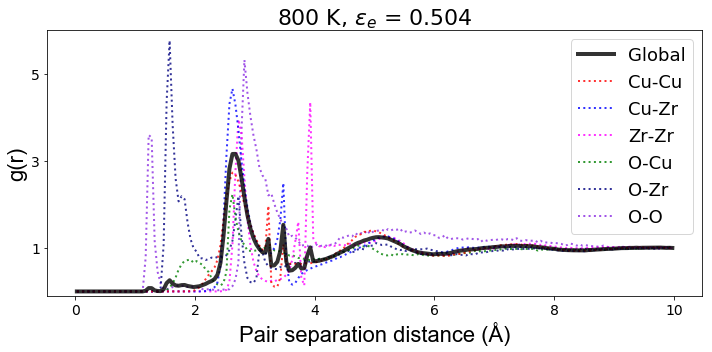

In [10]:
colors = ['k','red','blue','magenta','green','navy','blueviolet','steelblue','cyan']
ranges = range(0, len(df00.columns.values), 1)
lines =['-',':',':',':',':',':',':',':']
lws =[4,2,2,2,2,2,2,2]
alpha_value = 0.8
Zorders = range(len(df00.columns.values),0,-1)

font1 = {'family' : 'Arial',
'weight' : 'normal',
'color':'k',
'size'   : 22,
}

legendfontsize = 18
xylabelfontsize = 14
titlefontsize = 22

mpl.rcParams['xtick.labelsize'] = xylabelfontsize
mpl.rcParams['ytick.labelsize'] = xylabelfontsize

fig = plt.figure(figsize=(10,5))

for col, clr, line, Zorder, lw in zip(df00.columns.values.tolist(), colors, lines, Zorders, lws):
    f = interpolate.interp1d(df00.index.values, df00[col].values, kind='quadratic')
    plt.plot(df00.index.values, f(df00.index.values), color = clr, linestyle = line, linewidth = lw, alpha=alpha_value, zorder = Zorder)

plt.legend(df00.columns.values.tolist(), fontsize=legendfontsize)
plt.ylabel('g(r)',font1)

plt.ylim(-0.1,6)
plt.yticks([1,3,5])    
plt.xlabel('Pair separation distance (Å)',font1)
plt.title('%i K, $ε_e$ = %.3f'%(temp,estrain), fontsize= titlefontsize)
plt.tight_layout()
fig.savefig('RDF_ZrCuO_%iK_%i_AIO.jpg'%(temp, step),dpi=1200)

In [11]:
if(os.path.exists(pRDF_filename+'.csv')):
    os.remove(pRDF_filename+'.csv')
    print('file removed')
else:
    print('file does not exist')

if(os.path.exists(gRDF_filename+'.csv')):
        os.remove(gRDF_filename+'.csv')
        print('file removed')
else:
        print('file does not exist')

file removed
file removed
